<a id='0'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:220%; text-align:center; border-radius: 15px 50px;">Customer Churn Prediction 🏦🚪</p>

# **Import Libraries**

In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

# **Load Data**

In [27]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Exploratory Data Analysis</p>

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**In the context of a dataset on customer churn, the column or feature labeled "Exited" typically refers to whether a customer has churned or not.**

**The "Exited" column is a binary variable where:**
- **1** typically indicates that the customer has churned (i.e., they have stopped using the service, terminated their subscription, or ceased their relationship with the company).
- **0** typically indicates that the customer has not churned (i.e., they are still active or current customers).

In [29]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [32]:
df.shape

(10000, 14)

In [33]:
is_Exited = df["Exited"].value_counts()
print("Yes: ",is_Exited[1])
print("No: ",is_Exited[0])

Yes:  2037
No:  7963


**the data is un-balanced**

In [34]:
print(df.isna().sum().sum())
print(df.duplicated().sum())

0
0


**there is no nulls or duplicates in data**

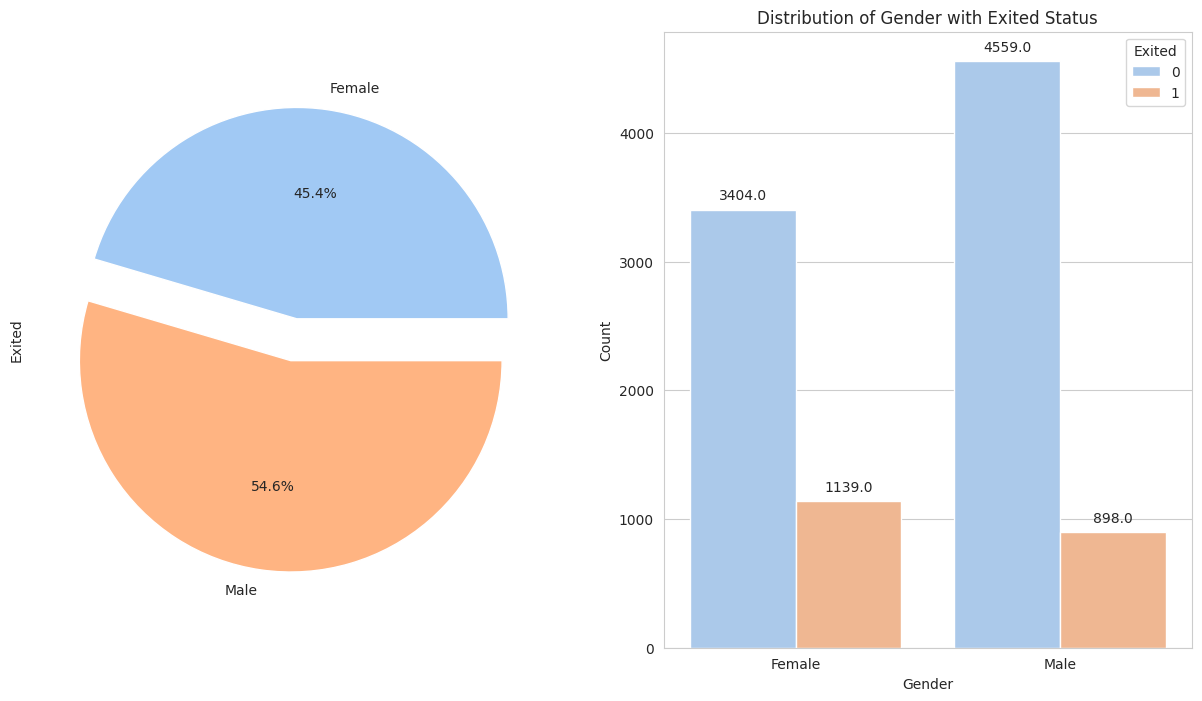

In [35]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="Gender", hue="Exited", data=df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Exited Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

**Males are more likely to churn than females and females are more likely to be exited to the service**

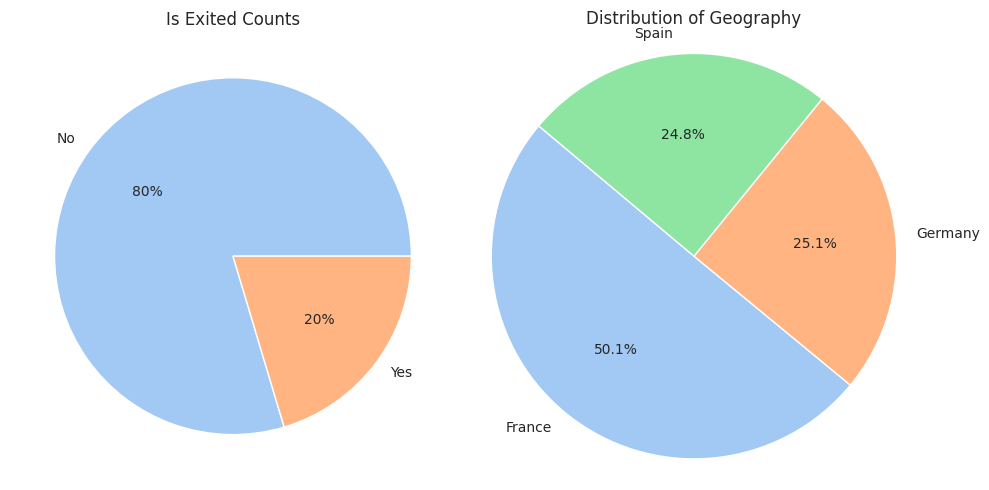

In [36]:
# Exited Counts Pie Chart
is_Exited = df["Exited"].value_counts()
plt.figure(figsize=(10, 5))  # Set the same figsize for both plots
plt.subplot(1, 2, 1)  # Subplot for the Exited Counts pie chart
plt.pie(is_Exited, labels=["No", "Yes"], autopct="%0.0f%%")
plt.title("Is Exited Counts")

# Distribution of Geography Pie Chart
plt.subplot(1, 2, 2)  # Subplot for the Distribution of Geography pie chart
geography_counts = df['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Geography')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

**The percentage of peaple to churn is 80% and not churn is only 20%, which leads to biased data.**

**Peaple of France are the biggest percentage and Spain is the smallest.**

<Axes: xlabel='Geography', ylabel='count'>

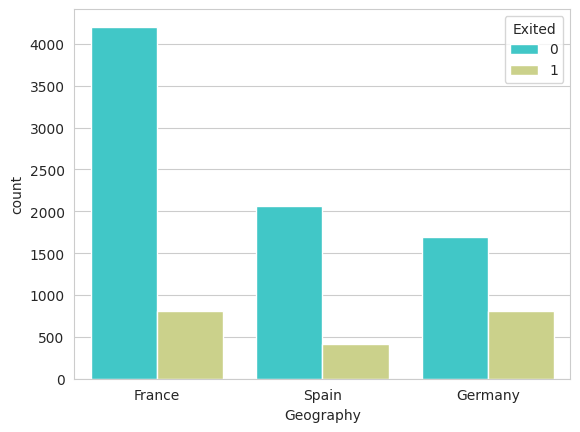

In [37]:
sns.countplot(x='Geography',hue='Exited',data=df, palette='rainbow')

**Frensh people are more likely to churn.**

**We can notice also that most people who are not churn come from Germany.**

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Data Preprocessing</p>

In [38]:
#---------------------------------------#
#       Delete unnecessary Columns      #
#---------------------------------------#
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [39]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,502,France,Female,42,8,159660,3,1,0,113931,1


# **Label Encoding**

In [40]:
# Initialize label encoders
le = LabelEncoder()
# Fit and transform the data
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0


# **Under Sampling and Standerd Scaler**

**Under Sampling is the best to overcome the imbamlanced data**

**sometimes accuracy is tricky and biased to a specific label so i measure based on f1-score**

In [41]:
No_class = df[df["Exited"]==0]
yes_class = df[df["Exited"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

X = down_samples.drop("Exited", axis=1)
y = down_samples["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

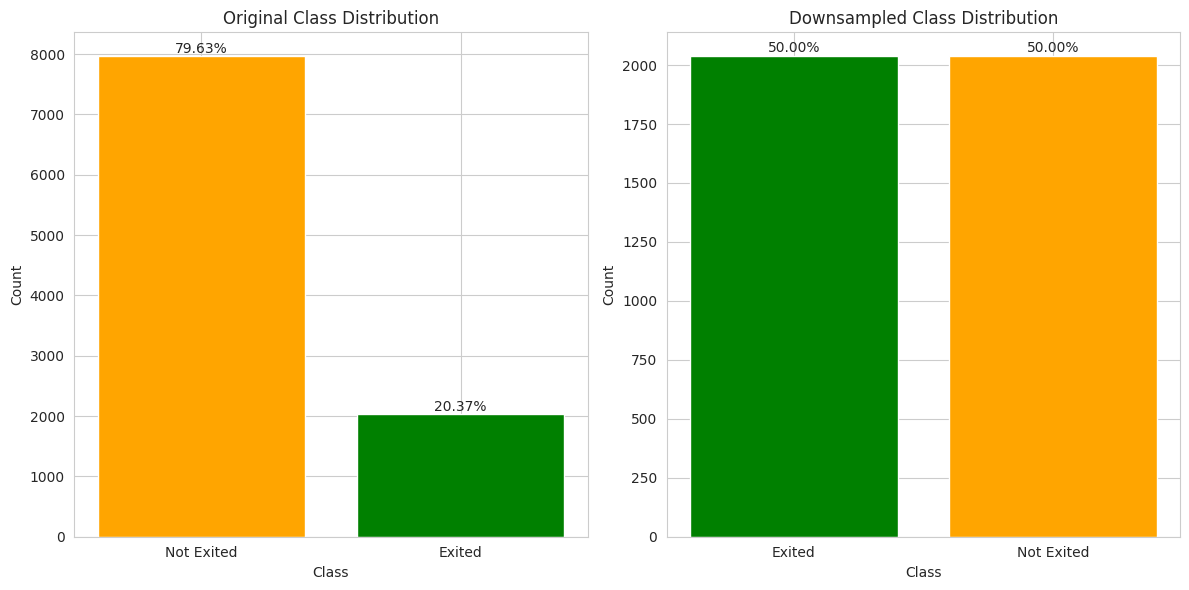

In [42]:
# Count the occurrences of each class in the original dataset
original_class_counts = df["Exited"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["Exited"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Not Exited', 'Exited'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['Not Exited', 'Exited'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

**The No Exited label is reduced to be equal to Exited label.**

<a id='4'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Models Training and Evaluation </p>

In [43]:
#---------------------------------------#
#             Decision Tree             #
#---------------------------------------#

DT = DecisionTreeClassifier(max_depth=(5), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       410
           1       0.80      0.65      0.71       405

    accuracy                           0.74       815
   macro avg       0.75      0.74      0.74       815
weighted avg       0.75      0.74      0.74       815

ID3 model accuracy is: 74.36%


In [44]:
#---------------------------------------#
#           Logistic Regression         #
#---------------------------------------#

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       410
           1       0.68      0.69      0.69       405

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815

Logistic Regression accuracy is: 68.71%


In [45]:
#---------------------------------------#
#               LinearSVC               #
#---------------------------------------#
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict = svm_model.predict(X_test)

print(classification_report(y_test, predict))
svm_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       410
           1       0.69      0.69      0.69       405

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815

SVC model accuracy is: 69.08%


In [46]:
#---------------------------------------#
#             Random Forest             #
#---------------------------------------#
# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       410
           1       0.77      0.75      0.76       405

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815

Random Forest model accuracy is: 76.44%


In [47]:
#---------------------------------------#
#                  XGB                  #
#---------------------------------------#
# Initialize and train the XGBoost classifier
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       410
           1       0.75      0.76      0.76       405

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815

XGBoost model accuracy is: 75.83%


In [48]:
#---------------------------------------#
#           Gradient Boosting           #
#---------------------------------------#

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, y_pred)
print('XGBoost model accuracy is: {:.2f}%'.format(gb_accuracy * 100))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       410
           1       0.78      0.77      0.78       405

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815

XGBoost model accuracy is: 77.91%


# **Butting all together.**

In [49]:
Algorithms = ['Gradient Boosting', 'Random Forest', 'XGB', 'ID3', 'Logistic Regression', 'SVC']
accuracy = [gb_accuracy, RF_accuracy, XGB_accuracy, ID3_accuracy, LR_accuracy, svm_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Gradient Boosting,0.779141
1,Random Forest,0.764417
2,XGB,0.758282
3,ID3,0.743558
4,Logistic Regression,0.687117
5,SVC,0.690798


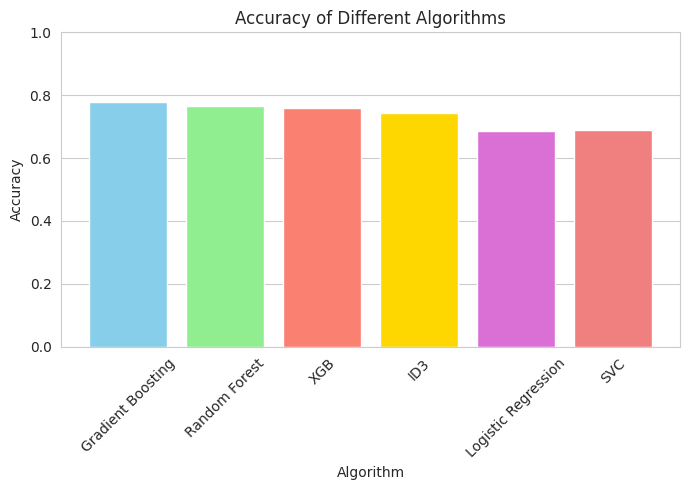

In [50]:
plt.figure(figsize=(7, 5))

# Define custom colors
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'lightcoral']

# Plot the bar chart with custom colors
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()